In [4]:
import numpy as np
import pandas as pd

# Generar 500 datos aleatorios entre 0 y 1000
data = np.random.uniform(0, 1000, 500)

# Crear un DataFrame
df = pd.DataFrame(data, columns=['Datos'])

# Definir los intervalos
bins = np.linspace(0, 1000, num=11)  # 10 intervalos

# Calcular las frecuencias
frecuencias, _ = np.histogram(df['Datos'], bins=bins)

# Crear la tabla de frecuencia
tabla_frecuencia = pd.DataFrame({
    'Intervalo': [f"{bins[i]:.1f} - {bins[i+1]:.1f}" for i in range(len(bins)-1)],
    'Frecuencia': frecuencias
})

# Frecuencia acumulada
tabla_frecuencia['Frecuencia Acumulada'] = tabla_frecuencia['Frecuencia'].cumsum()

print("Setup terminado")
print(df)
print(tabla_frecuencia)

Setup terminado
          Datos
0    734.769465
1    636.099347
2    678.794147
3     90.315898
4     66.488448
..          ...
495  827.185458
496  788.191603
497  432.536835
498   32.495873
499  647.428402

[500 rows x 1 columns]
        Intervalo  Frecuencia  Frecuencia Acumulada
0     0.0 - 100.0          55                    55
1   100.0 - 200.0          50                   105
2   200.0 - 300.0          48                   153
3   300.0 - 400.0          52                   205
4   400.0 - 500.0          44                   249
5   500.0 - 600.0          44                   293
6   600.0 - 700.0          37                   330
7   700.0 - 800.0          61                   391
8   800.0 - 900.0          57                   448
9  900.0 - 1000.0          52                   500


Datos Generados:
        Pais  Salario  Personas   Profesion
0     México    86589         2   Ingeniero
1       Perú    39361        30     Artista
2  Argentina    41875         6  Arquitecto
3   Colombia    56661        81  Arquitecto
4   Colombia    22679        41     Abogado

Tabla de Frecuencias:
    Profesión  Frecuencia  Frecuencia Relativa  Frecuencia Acumulada
0      Doctor          79                0.158                    79
1  Científico          76                0.152                   155
2   Ingeniero          76                0.152                   231
3     Abogado          73                0.146                   304
4    Profesor          69                0.138                   373
5     Artista          65                0.130                   438
6  Arquitecto          62                0.124                   500


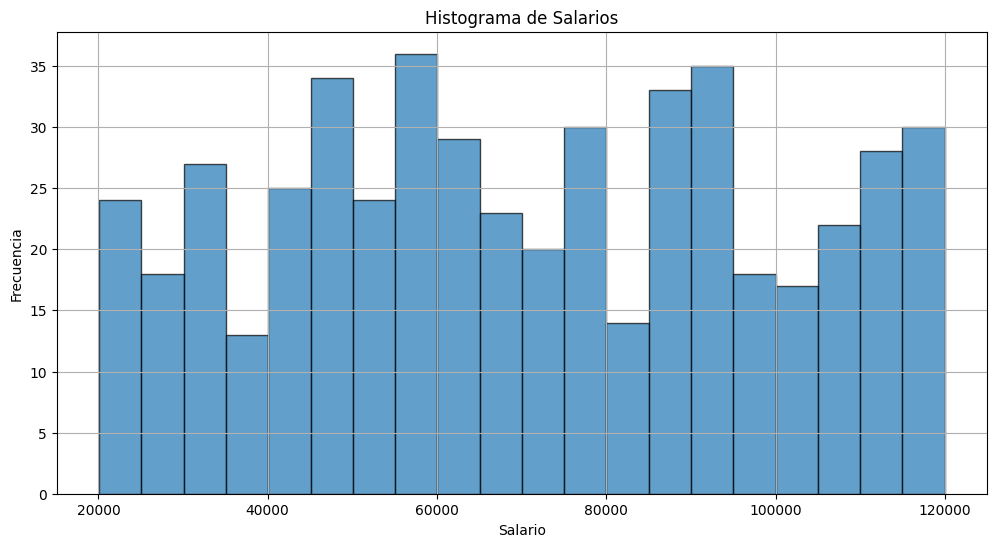

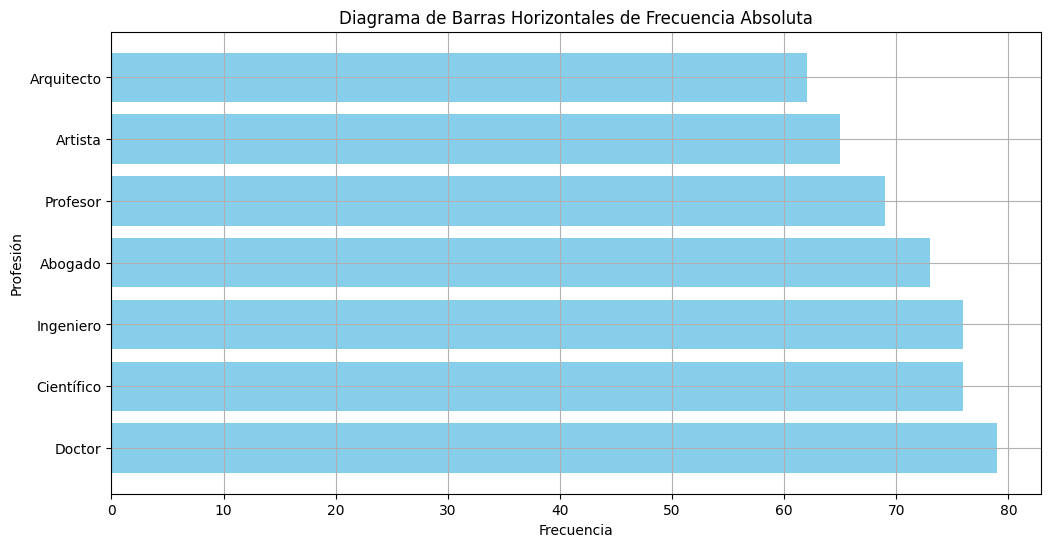

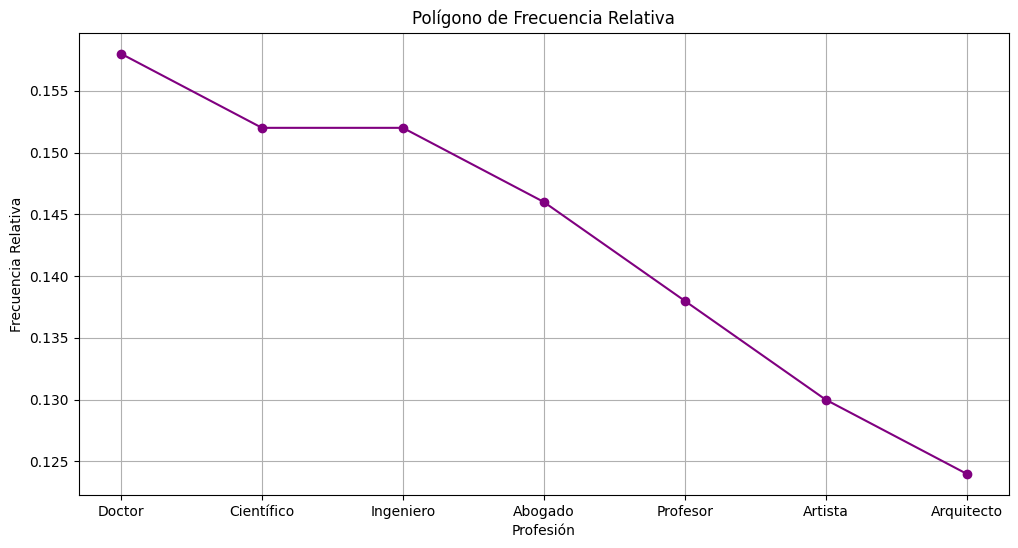

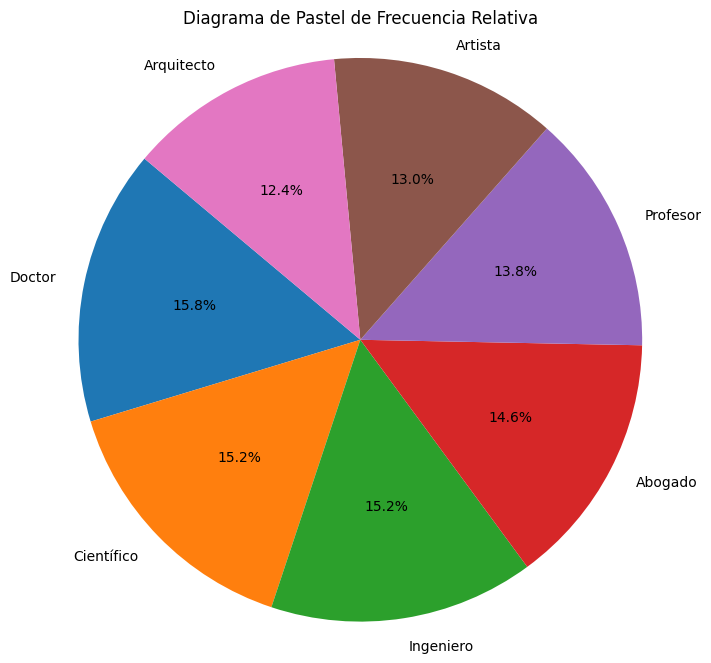

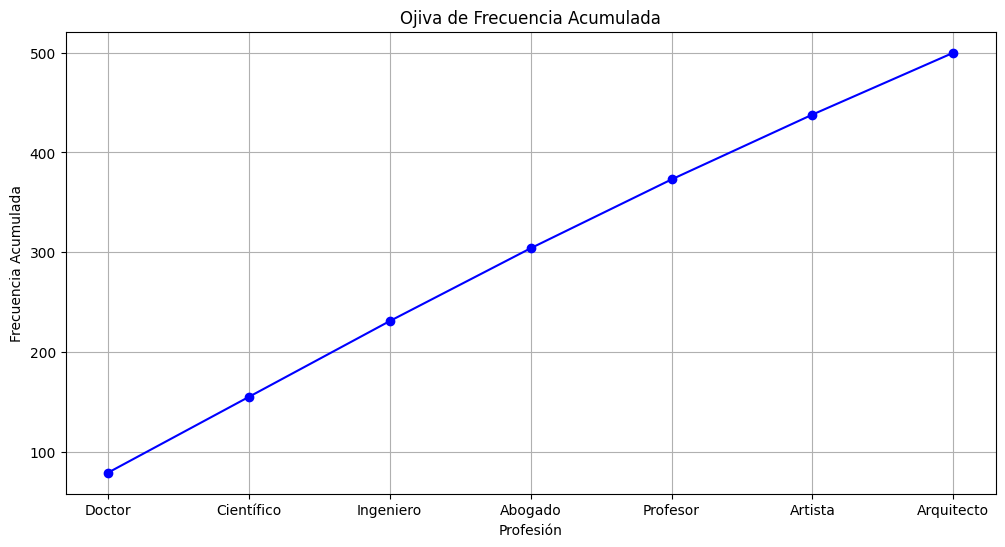

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración
np.random.seed(0)  # Para reproducibilidad

# Datos de ejemplo
paises = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'México', 'Perú', 'Venezuela']
profesiones = ['Ingeniero', 'Doctor', 'Profesor', 'Abogado', 'Arquitecto', 'Científico', 'Artista']

# Generar 500 datos aleatorios
num_datos = 500
data = {
    'Pais': np.random.choice(paises, num_datos),
    'Salario': np.random.randint(20000, 120000, num_datos),  # Salarios entre 20,000 y 120,000
    'Personas': np.random.randint(1, 100, num_datos),  # Número de personas entre 1 y 100
    'Profesion': np.random.choice(profesiones, num_datos)
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar los primeros registros
print("Datos Generados:")
print(df.head())

# Calcular la frecuencia de cada profesión
frecuencia_profesion = df['Profesion'].value_counts()

# Crear tabla de frecuencias
tabla_frecuencia = pd.DataFrame({
    'Profesión': frecuencia_profesion.index,
    'Frecuencia': frecuencia_profesion.values
})

# Frecuencia relativa
tabla_frecuencia['Frecuencia Relativa'] = tabla_frecuencia['Frecuencia'] / num_datos

# Frecuencia acumulada
tabla_frecuencia['Frecuencia Acumulada'] = tabla_frecuencia['Frecuencia'].cumsum()

# Mostrar la tabla de frecuencias
print("\nTabla de Frecuencias:")
print(tabla_frecuencia)

# Gráfica de Frecuencia Absoluta - Histograma de Salarios
plt.figure(figsize=(12, 6))
plt.hist(df['Salario'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histograma de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# Gráfica de Frecuencia Absoluta - Diagrama de Barras Horizontales
plt.figure(figsize=(12, 6))
plt.barh(tabla_frecuencia['Profesión'], tabla_frecuencia['Frecuencia'], color='skyblue')
plt.title('Diagrama de Barras Horizontales de Frecuencia Absoluta')
plt.xlabel('Frecuencia')
plt.ylabel('Profesión')
plt.grid()
plt.show()

# Gráfica de Frecuencia Relativa - Polígono de Frecuencia
plt.figure(figsize=(12, 6))
plt.plot(tabla_frecuencia['Profesión'], tabla_frecuencia['Frecuencia Relativa'], marker='o', color='purple')
plt.title('Polígono de Frecuencia Relativa')
plt.xlabel('Profesión')
plt.ylabel('Frecuencia Relativa')
plt.grid()
plt.show()

# Gráfica de Frecuencia Relativa - Diagrama de Pastel
plt.figure(figsize=(8, 8))
plt.pie(tabla_frecuencia['Frecuencia Relativa'], labels=tabla_frecuencia['Profesión'], autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de Pastel de Frecuencia Relativa')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

# Gráfica de Frecuencia Acumulada - Ojiva
plt.figure(figsize=(12, 6))
plt.plot(tabla_frecuencia['Profesión'], tabla_frecuencia['Frecuencia Acumulada'], marker='o', color='blue')
plt.title('Ojiva de Frecuencia Acumulada')
plt.xlabel('Profesión')
plt.ylabel('Frecuencia Acumulada')
plt.grid()
plt.show()